In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('DataSet/no2.csv', parse_dates=['Date Local'])
date = dataset["Date Local"]
means = dataset.iloc[:, 2].values
print(means)

[19.041667 19.041667 19.041667 19.041667 22.958333 22.958333 22.958333
 22.958333 38.125    38.125    38.125    38.125    40.26087  40.26087
 40.26087  40.26087  48.45     48.45     48.45     48.45     39.95
 39.95     39.95     39.95     29.625    29.625    29.625    29.625
 29.666667 29.666667 29.666667 29.666667 25.083333 25.083333 25.083333
 25.083333 37.666667 37.666667 37.666667 37.666667 50.5      50.5
 50.5      50.5      49.125    49.125    49.125    49.125    73.285714
 73.285714 73.285714 73.285714 66.541667 66.541667 66.541667 66.541667
 53.166667 53.166667 53.166667 53.166667 45.75     45.75     45.75
 45.75     59.25     59.25     59.25     59.25     66.791667 66.791667
 66.791667 66.791667 59.041667 59.041667 59.041667 59.041667 48.357143
 48.357143 48.357143 48.357143 54.5      54.5      54.5      54.5
 38.083333 38.083333 38.083333 38.083333 37.958333 37.958333 37.958333
 37.958333 53.333333 53.333333 53.333333 53.333333 42.583333 42.583333
 42.583333 42.583333]


In [3]:
def wrangle(df):
    
    df["Date Local"]=pd.to_datetime(df["Date Local"])
    df["Month"]=df["Date Local"].dt.month
    df["Year"]=df["Date Local"].dt.year
    df=df.drop("Date Local",axis=1)
    df=df.drop("Month",axis=1)
    df=df[df.Year>=1850]
    df=df.set_index(['Year'])
    #date=df.iloc[:,:0]
    
    
    df=df.dropna()
    
    return df

In [4]:
dataset = wrangle(dataset)

In [5]:
dataset

,NO2 Units,NO2 Mean
Year,,
1917,Parts per billion,19.041667
1918,Parts per billion,19.041667
1919,Parts per billion,19.041667
1920,Parts per billion,19.041667
1921,Parts per billion,22.958333
...,...,...
2012,Parts per billion,53.333333
2013,Parts per billion,42.583333
2014,Parts per billion,42.583333


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1917 to 2016
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NO2 Units  100 non-null    object 
 1   NO2 Mean   100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [7]:
dataset = dataset.drop(columns=['NO2 Units'],axis=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1917 to 2016
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO2 Mean  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [9]:
year_temp=[]
for i in range(len(date)):
    year_temp.append(date[i].year) 
year_temp = np.array(year_temp)
year_temp = year_temp.reshape(-1, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(year_temp,means,test_size=0.1,random_state=10)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
year_temp_poly = poly_reg.fit_transform(year_temp)
poly_reg.fit(year_temp_poly, means)

PolynomialFeatures(degree=3)

In [12]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(year_temp_poly, means)

LinearRegression()

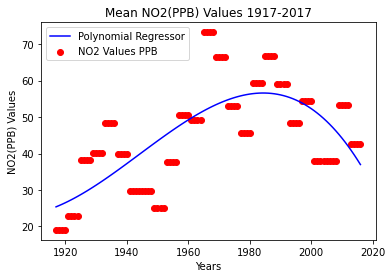

In [13]:
plt.scatter(year_temp, means, color = 'red',label="NO2 Values PPB")
plt.plot(year_temp, lin_reg_2.predict(poly_reg.fit_transform(year_temp)), color = 'blue',label="Polynomial Regressor")
plt.title("Mean NO2(PPB) Values 1917-2017")
plt.xlabel("Years")
plt.ylabel("NO2(PPB) Values")
plt.legend(loc="upper left")
plt.show()

In [14]:
z = lin_reg_2.predict(poly_reg.fit_transform(year_temp))

from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is ",round(mean_squared_error(means, z),4))

#Mean Square Error

The Mean Squared Error is  93.3103


In [15]:
print(lin_reg_2.predict(poly_reg.fit_transform([[2050]])))
#print(dataset_2.loc[len(dataset_2)-1,"ANNUAL"])

[-46.76926575]
